In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import the data 
data = pd.read_csv("Indian automoble buying behavour study 1.0.csv")
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


# EDA

In [3]:
#shape of the data 
data.shape 

(99, 13)

In [4]:
# data information
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [5]:
#cheaking the null values 
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [6]:
data.duplicated().sum()

0

* observation : we dont have any null and duplicate values in this dataset 

In [7]:
#statistical description of the data 
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [8]:
data.columns 

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [9]:
#profession 
data['Profession'].value_counts()

Salaried    64
Business    35
Name: Profession, dtype: int64

* Data contains two categories in profession one is having 64 Salaried people and another is 35 business type people 

In [10]:
#cheaking marital status 
data['Marrital Status'].value_counts()

Married    84
Single     15
Name: Marrital Status, dtype: int64

In [11]:
data['Education'].value_counts()

Post Graduate    56
Graduate         43
Name: Education, dtype: int64

* in our data there are 56 people who completed their post graduation and 43 people has copleted their graduation  

In [12]:
pd.DataFrame(data['No of Dependents'].unique())

,0
0,0
1,2
2,4
3,3


In [13]:
len(data[(data['Salary'] >= 800000) & (data['Wife Salary'] == 600000)])

5

### Possibility of car making based on Education

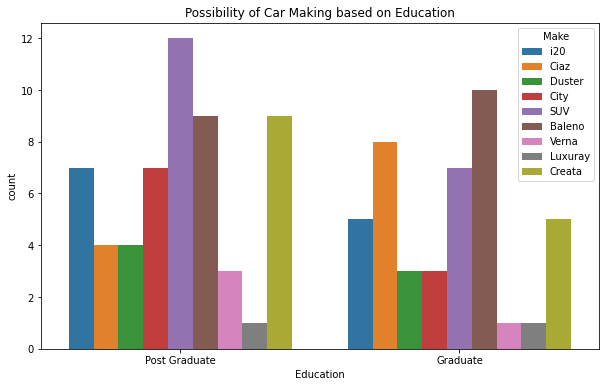

In [14]:
# Countplot to visualize the possibility of car making based on education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Make', data=data)
plt.title('Possibility of Car Making based on Education')
plt.show()


* observation : from above bar chart we can say that more post graduates can afford SUVs,Creta,i20,city,Duster,verna than graduates one the other hand more graduates can make ciaz and baleno the postgraduates, Again both the categories have low probability in making luxury cars 

### Relationship between car making possibility and Total Salary and personal loan 

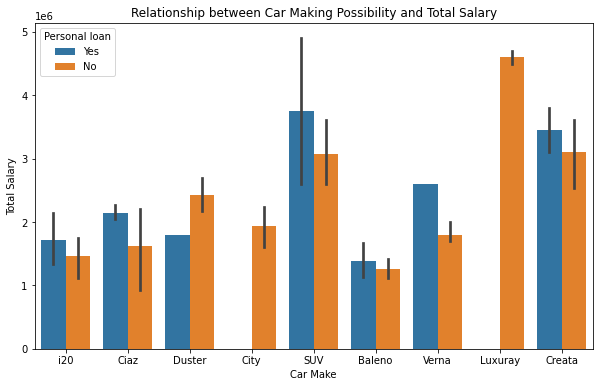

In [15]:
# Bar plot to visualize the relationship between car making possibility and total salary
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='Total Salary', hue='Personal loan', data=data)
plt.title('Relationship between Car Making Possibility and Total Salary')
plt.xlabel('Car Make')
plt.ylabel('Total Salary')
plt.show()

* observation : from the charts there is high probability that if people have taken the personal loan thay can afford a car.people can afford more SUVs,Ciaz,Verna,Creata brands with personal loan than without any. 

In [16]:
#maximum price of car 
data['Price'].max()

3000000

### People with Wife Salary Affording High Price Cars by Make

In [17]:
#high car prices
high_price_threshold = 1500000  
high_salary_data = data[data['Wife Salary'] > 0]
affordable_high_price_cars = high_salary_data[high_salary_data['Total Salary'] >= high_price_threshold]

#count the number of people in each category
counts = affordable_high_price_cars['Make'].value_counts()

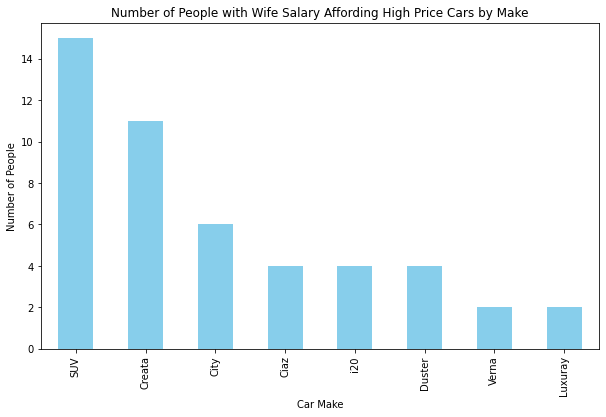

In [18]:
# Plot the data
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Number of People with Wife Salary Affording High Price Cars by Make')
plt.xlabel('Car Make')
plt.ylabel('Number of People')
plt.show()


* observation: There are more than 14 people who can make SUV cars if their wives are working and making money followed by Creata,City,ciaz,i20,and Duster  

In [19]:
#people having house loan or not 
data['House Loan'].value_counts()

No     62
Yes    37
Name: House Loan, dtype: int64

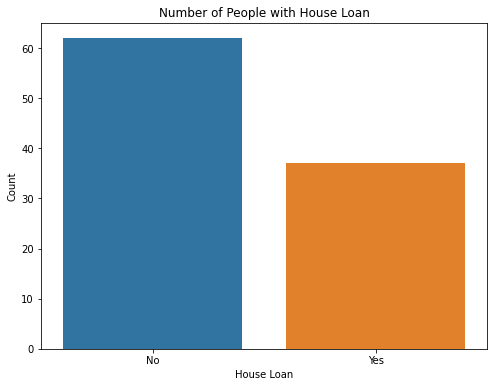

In [20]:
# How many people have House loan 
plt.figure(figsize=(8, 6))
sns.countplot(x='House Loan', data=data)
plt.title('Number of People with House Loan')
plt.xlabel('House Loan')
plt.ylabel('Count')
plt.show()


There are 37 people in the data have taken House loan 

In [21]:
#Young Singles
young_singles = data[data['Age'] < 30].value_counts().sum()
print("No of young_singles: ",young_singles)

No of young_singles:  14


In [22]:
# Family-oriented
family_oriented = data[(data['Age'] >= 30) & (data['No of Dependents'] > 0)].value_counts().sum()
print('No of family_oriented people: ',family_oriented)

No of family_oriented people:  75


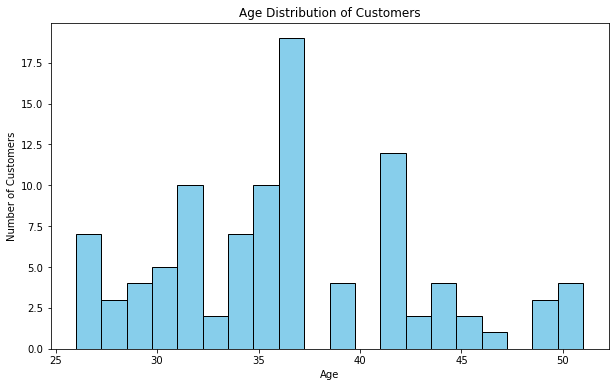

In [23]:
# Visualizing Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

* from the above chart the age factor is varing mostly in between 30 to 45

In [24]:
# Income and Loan Status
high_income_individuals = data[data['Salary'] > 2000000]
loan_takers = data[(data['Personal loan'] == 'Yes') | (data['House Loan'] == 'Yes')]
print('high_income_individuals:',len(high_income_individuals))
print('loan_takers:',len(loan_takers))

high_income_individuals: 28
loan_takers: 45


In [25]:
#Education and Make Preference
post_graduates = len(data[data['Education'] == 'Post Graduate'])
suv_lovers = len(data[data['Make'] == 'SUV'])
print('post_graduates:',post_graduates)
print('suv_lovers:',suv_lovers)

post_graduates: 56
suv_lovers: 19


In [26]:
#dual_income_families
dual_income_families = len(data[data['Wife Working'] == 'Yes'])
dual_income_families

52

In [27]:
high_spending_customers = len(data[data['Total Salary'] > 2000000])
baleno_enthusiasts = len(data[data['Make'] == 'Baleno'])
print('high_spending_customers:',high_spending_customers)
print('baleno_enthusiasts:',baleno_enthusiasts)

high_spending_customers: 50
baleno_enthusiasts: 19


In [28]:
data.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object

In [29]:
#copy the original data 
df1 = data.copy()

In [30]:
df1.rename(columns={'Total Salary': 'Total_Income'}, inplace=True)

In [31]:
#conberting the categorical data into numerical format 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to selected columns
categorical_columns = ['Profession','Marrital Status','Education', 'Personal loan', 'House Loan','Wife Working','Make']
for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])


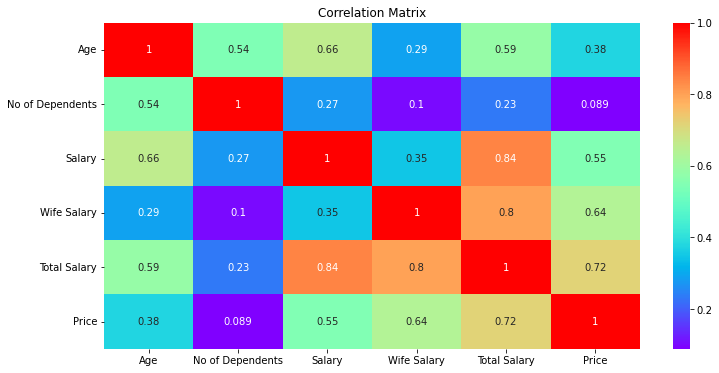

In [32]:
# Correlation matrix
plt.figure(figsize = (12,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Matrix')
plt.show()

In [33]:
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total_Income,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1600000


In [34]:
#Selecting the Features for Market Segmentation
selected_features = ['Age', 'Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Total_Income', 'Price']

#Extract selected features from the original DataFrame
segmentation_data = df1[selected_features]

### Detecting outliers with boxplot 

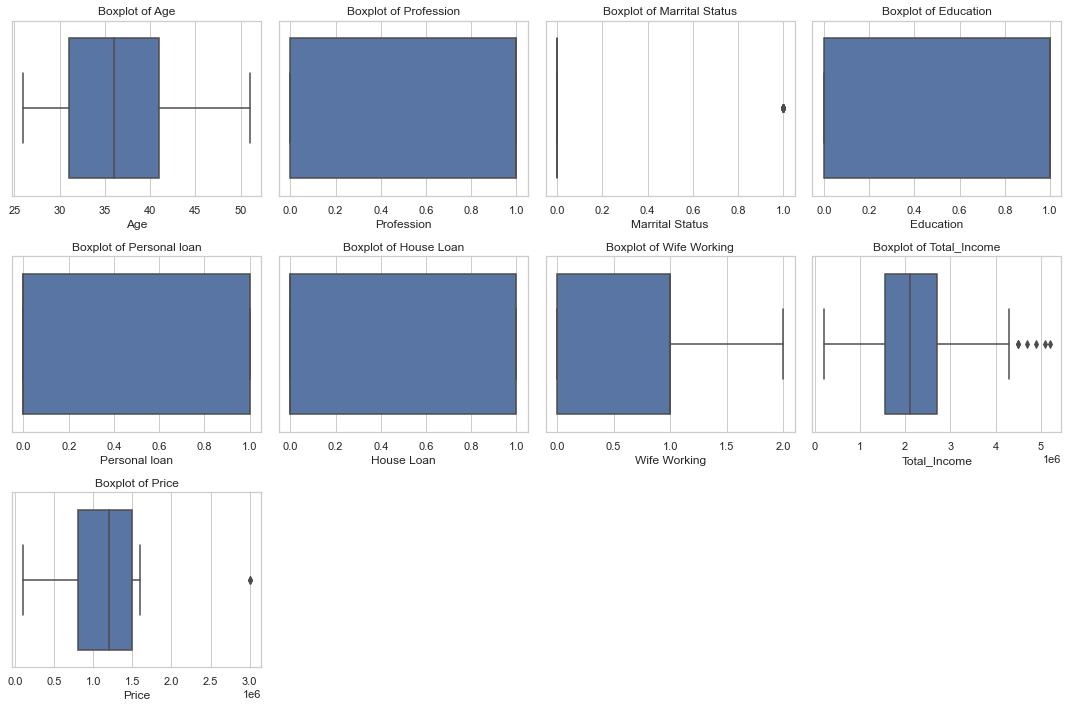

In [35]:
plt.figure(figsize=(15, 10))
# Set the style of seaborn
sns.set(style="whitegrid")
# Loop through each feature and create a boxplot
for i, feature in enumerate(selected_features):
    plt.subplot(3, 4, i + 1)  
    sns.boxplot(x=segmentation_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

* observation : form the above boxplot outliers are present into the total_income and Price 

In [36]:
df1.columns 

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total_Income', 'Make', 'Price'],
      dtype='object')

In [37]:
#Removing the outliers 
#Total_Income
Q1 = segmentation_data.Total_Income.quantile(0.25)
Q3 = segmentation_data.Total_Income.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.Total_Income >= Q1 - 1.5*IQR) & (segmentation_data.Total_Income <= Q3 + 1.5*IQR)]

#Price
Q1 = segmentation_data.Price.quantile(0.25)
Q3 = segmentation_data.Price.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.Price >= Q1 - 1.5*IQR) & (segmentation_data.Price <= Q3 + 1.5*IQR)]

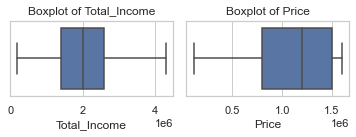

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
selected_features = ['Total_Income', 'Price']

# Loop through each feature and create a boxplot
for i, feature in enumerate(selected_features):
    plt.subplot(3, 4, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(x=segmentation_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
#scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(segmentation_data)
df_scaled

array([[-1.47960779,  0.75912528,  2.28035085,  0.88795357,  1.41421356,
        -0.77681933, -0.99100817, -1.54665796, -0.96902029],
       [-0.13549522,  0.75912528, -0.43852901,  0.88795357,  1.41421356,
         1.28730061,  0.92907016, -0.12602398, -0.39519739],
       [ 1.54464549, -1.31730563, -0.43852901, -1.12618501,  1.41421356,
         1.28730061, -0.99100817, -0.36279631,  0.17862552],
       [ 0.87258921, -1.31730563, -0.43852901,  0.88795357, -0.70710678,
        -0.77681933,  0.92907016,  0.11074835,  0.17862552],
       [-0.8075515 ,  0.75912528, -0.43852901,  0.88795357,  1.41421356,
        -0.77681933,  0.92907016,  0.58429301,  1.32627132],
       [-1.31159372,  0.75912528, -0.43852901, -1.12618501,  1.41421356,
         1.28730061, -0.99100817, -1.4282718 , -1.25593174],
       [-0.8075515 ,  0.75912528, -0.43852901, -1.12618501, -0.70710678,
        -0.77681933,  0.92907016, -0.36279631,  0.17862552],
       [-0.47152336, -1.31730563, -0.43852901,  0.88795357, -0

In [41]:
segmentation_data.columns 

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'Personal loan',
       'House Loan', 'Wife Working', 'Total_Income', 'Price'],
      dtype='object')

In [42]:
df2 = pd.DataFrame(df_scaled, columns = ['Age', 'Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan','Wife Working', 'Total_Income', 'Price'] )
df2.head()

,Age,Profession,Marrital Status,Education,Personal loan,House Loan,Wife Working,Total_Income,Price
0,-1.479608,0.759125,2.280351,0.887954,1.414214,-0.776819,-0.991008,-1.546658,-0.969020
1,-0.135495,0.759125,-0.438529,0.887954,1.414214,1.287301,0.929070,-0.126024,-0.395197
2,1.544645,-1.317306,-0.438529,-1.126185,1.414214,1.287301,-0.991008,-0.362796,0.178626
3,0.872589,-1.317306,-0.438529,0.887954,-0.707107,-0.776819,0.929070,0.110748,0.178626
4,-0.807552,0.759125,-0.438529,0.887954,1.414214,-0.776819,0.929070,0.584293,1.326271


### Market Segmentation using K-means Clustering:

In [43]:
from sklearn.cluster import KMeans

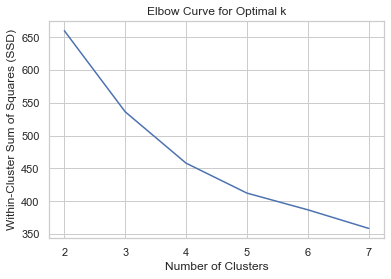

In [44]:
# Elbow curve method to find the ideal number of clusters.
#ssd - Wcss(Within cluster sum of square)
#ssd(Sum of Squared distance)
clusters = list(range(2, 8))
ssd = []

for num_clusters in clusters:
    model_clus = KMeans(n_clusters=num_clusters, max_iter=150, random_state=50)
    model_clus.fit(df2)
    ssd.append(model_clus.inertia_)  # Sum of Squared distance   # SIGNINFICANT CHANGE IN THE PLOT

# Plotting the Elbow curve
plt.plot(clusters, ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (SSD)')
plt.title('Elbow Curve for Optimal k')
plt.show()

In [45]:
# FROM THE ABOVE GRAPH WE ARE INFERREING THAT OPTIMAL NUMBER OF K = 4 CLUSTERS

In [46]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df2)   #MODEL BUILDING

KMeans(max_iter=150, n_clusters=4, random_state=15)

In [47]:
# Getting cluster labels
cluster_labels = cluster.labels_

In [48]:
cluster_labels

array([0, 2, 2, 3, 1, 2, 1, 3, 3, 2, 1, 2, 3, 0, 2, 0, 0, 0, 3, 1, 3, 1,
       3, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 2, 1, 3, 1, 0, 1, 2, 3, 1, 1, 2,
       1, 3, 1, 2, 1, 3, 1, 1, 1, 2, 3, 0, 0, 0, 0, 0, 0, 2, 1, 3, 1, 3,
       1, 3, 1, 1, 3, 1, 3, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 3, 1,
       0, 0, 2, 1, 2])

In [49]:
# Assign the cluster labels to your DataFrame
df2['Cluster'] = cluster_labels

In [50]:
df2

,Age,Profession,Marrital Status,Education,Personal loan,House Loan,Wife Working,Total_Income,Price,Cluster
0,-1.479608,0.759125,2.280351,0.887954,1.414214,-0.776819,-0.991008,-1.546658,-0.969020,0
1,-0.135495,0.759125,-0.438529,0.887954,1.414214,1.287301,0.929070,-0.126024,-0.395197,2
2,1.544645,-1.317306,-0.438529,-1.126185,1.414214,1.287301,-0.991008,-0.362796,0.178626,2
3,0.872589,-1.317306,-0.438529,0.887954,-0.707107,-0.776819,0.929070,0.110748,0.178626,3
4,-0.807552,0.759125,-0.438529,0.887954,1.414214,-0.776819,0.929070,0.584293,1.326271,1
...,...,...,...,...,...,...,...,...,...,...
88,-1.479608,0.759125,2.280351,0.887954,-0.707107,-0.776819,-0.991008,-1.428272,-1.255932,0
89,-1.479608,-1.317306,2.280351,-1.126185,-0.707107,-0.776819,-0.991008,0.347521,1.326271,0
90,2.552730,-1.317306,-0.438529,-1.126185,1.414214,1.287301,-0.991008,0.110748,-0.108286,2
91,2.552730,0.759125,-0.438529,0.887954,-0.707107,-0.776819,0.929070,2.241699,1.039360,1


In [51]:
# Calculating mean for each segment
segment_means = df2.groupby('Cluster').mean()

# Display the calculated segment means
print("Segment Means:")
print(segment_means)


Segment Means:
              Age  Profession  Marrital Status  Education  Personal loan  \
Cluster                                                                    
0       -1.277991   -0.071447         2.280351   0.082298   7.401487e-17   
1        0.256538    0.355375        -0.438529  -0.007219  -4.124790e-01   
2        0.391458    0.098443        -0.438529   0.063988   1.317790e+00   
3        0.066122   -0.694376        -0.438529  -0.119116  -7.071068e-01   

         House Loan  Wife Working  Total_Income     Price  
Cluster                                                    
0         -0.776819     -0.863003     -1.025759 -0.280433  
1         -0.088779      0.715728      0.883547  0.879965  
2          1.287301     -0.292798     -0.217504 -0.682109  
3         -0.673613     -0.318981     -0.581811 -0.623292  


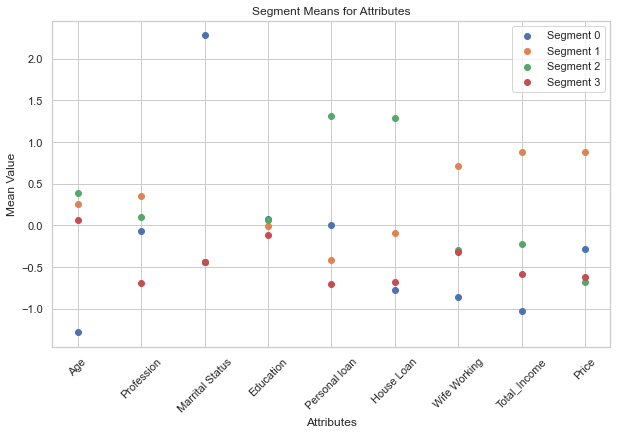

In [52]:
# Market segment analysis 
plt.figure(figsize=(10, 6))
for segment in segment_means.index:
    plt.scatter(segment_means.columns, segment_means.loc[segment], label=f'Segment {segment}')

plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Segment Means for Attributes')
plt.xticks(rotation=45)
plt.legend()
plt.show()


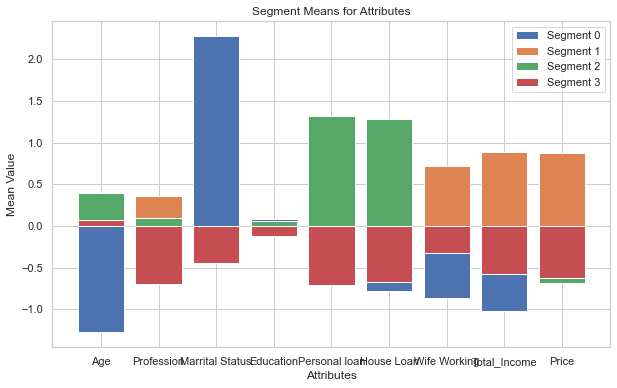

In [54]:
# Plotting a bar plot
plt.figure(figsize=(10, 6))
for segment in segment_means.index:
    plt.bar(segment_means.columns, segment_means.loc[segment], label=f'Segment {segment}')

plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Segment Means for Attributes')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.28693968402221126
For n_clusters=3, the silhouette score is 0.2589526531575151
For n_clusters=4, the silhouette score is 0.2897897555744056
For n_clusters=5, the silhouette score is 0.262276259263673
For n_clusters=6, the silhouette score is 0.24156556062122822
For n_clusters=7, the silhouette score is 0.24276304063053822
For n_clusters=8, the silhouette score is 0.23238469258392655


Here we have our best k For n_clusters=4, the silhouette score is 0.2897897555744056

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, with a high value indicating that the object is well matched to its own cluster and poorly matched to neighboring clusters. The ideal silhouette score is close to 1, suggesting well-defined clusters.

In general, the silhouette score can be interpreted as follows:

- **Near +1**: Indicates that the sample is far away from the neighboring clusters.
- **0**: Indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
- **Near -1**: Indicates that those samples might have been assigned to the wrong cluster.

Therefore, a higher silhouette score is generally considered better, and you typically aim for a score as close to 1 as possible. However, the interpretation may vary based on the specific context and characteristics of the data.

In [57]:
df2.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'Personal loan',
       'House Loan', 'Wife Working', 'Total_Income', 'Price', 'Cluster'],
      dtype='object')

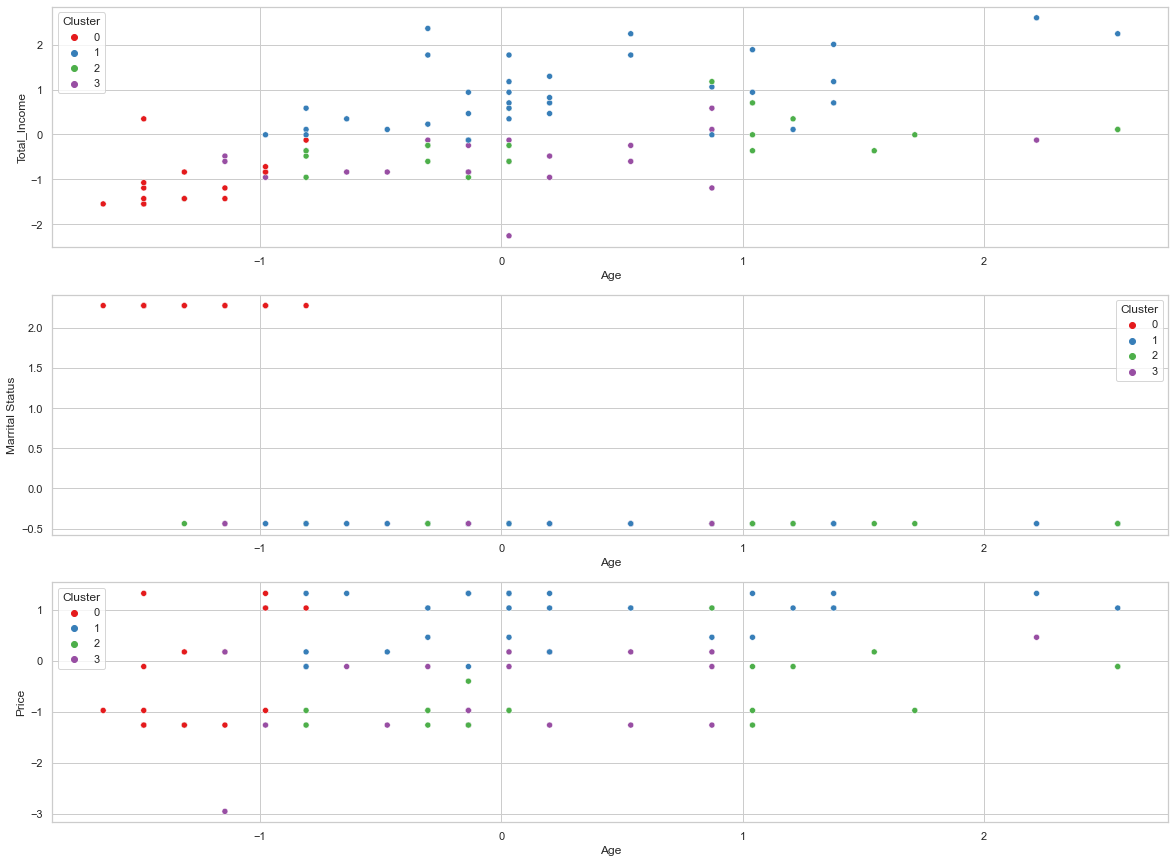

In [58]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Age', y = 'Total_Income',hue='Cluster',data = df2,palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Age', y = 'Marrital Status',hue='Cluster', data = df2,palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'Age', y = 'Price',hue='Cluster', data=df2,palette="Set1")
plt.show()

* the above visualization shows the effect of different factor with the Age factor with the help of different colors 